In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_lfw_pairs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
np.random.seed(42)

In [ ]:
def make_dataset():
    # X: 2000, 2
    # Y: 2000, # of perms
    num_data = 20000
    Xt, Xv, y_base, yv = train_test_split(*make_moons(num_data, noise=0.1), test_size=0.2)
    Y = y_base
    num_data = len(y_base)
    noise_percent = []
    for rr in np.linspace(0, num_data*0.3, 4, dtype='int'):
        noise_percent.append(rr / num_data)
        rand_idx = np.random.choice(num_data, size=(rr,), replace=False)
        print(rand_idx.shape)
        noisy_y = y_base
        noisy_y[rand_idx] = ~noisy_y[rand_idx]
        Y = np.vstack((Y, noisy_y))
    return Xt, Xv, Y, yv, noise_percent

In [ ]:
def make_faces_dataset():
    faces = fetch_lfw_pairs()
    Xt, y_base = faces['data'], faces['target']
    facesv = fetch_lfw_pairs(subset='test')
    Xv, yv = facesv['data'], facesv['target']
    Y = y_base
    num_data = len(y_base)
    noise_percent = []
    for rr in np.linspace(0, num_data*0.4, 4, dtype='int'):
        noise_percent.append(rr / num_data)
        rand_idx = np.random.choice(num_data, size=(rr,), replace=False)
        print(rand_idx.shape)
        noisy_y = y_base
        noisy_y[rand_idx] = ~noisy_y[rand_idx]
        Y = np.vstack((Y, noisy_y))
    return Xt, Xv, Y, yv, noise_percent

(0,)
(1600,)
(3200,)
(4800,)


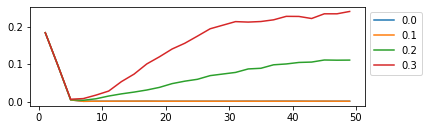

In [ ]:
Xt, Xv, Y, yv, noise_percent = make_dataset()
plt.subplot(211)
for y, n in zip(Y, noise_percent):
    depths = range(1, 50, 2)
    scores = []
    for d in depths:
        dtc = DecisionTreeClassifier(criterion='entropy', max_depth = d)
        dtc.fit(Xt, y)
        scores.append(1 - dtc.score(Xv, yv))
    plt.plot(depths, scores, label=str(n))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

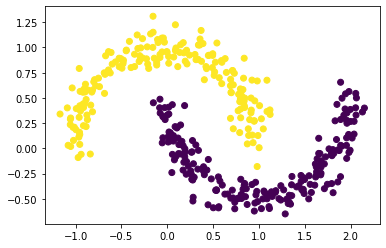

In [ ]:
plt.scatter(Xv[:, 0], Xv[:, 1], c=yv)